<a href="https://colab.research.google.com/github/HENICHE-Thilleli/Time-Series-Forecasting-Using-Machine-Learning/blob/main/Linear%20regression/linearRdate_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.metrics import r2_score
from statistics import pvariance
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Charger les données
df = pd.read_csv('/content/drive/MyDrive/external.csv', parse_dates=True, sep=";")
df['date'] = pd.to_datetime(df['date'])
df1 = df[['date', 'HashRate','PriceUSD']]
df1 = df1.set_index('date')

In [ ]:
def create_features(df1):
    """
    Create time series features based on time series index.
    """
    df1 = df1.copy()
    df1['dayofweek'] = df1.index.dayofweek
    df1['quarter'] = df1.index.quarter
    df1['month'] = df1.index.month
    df1['year'] = df1.index.year
    df1['week']=df1.index.week
    df1['dayofyear'] = df1.index.dayofyear
    df1['dayofmonth'] = df1.index.day
    df1['weekofyear'] = df1.index.isocalendar().week
    return df1

df1 = create_features(df1)

<ipython-input-4-93dac2349ee3>:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df1['week']=df1.index.week


In [ ]:
FEATURES = ['year','dayofweek','quarter','month','dayofmonth']
TARGET = ['PriceUSD']

train = df1[:int(len(df1)*0.70)]
test = df1[int(len(df1)*0.70):]

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
# Entraînement et prédiction avec la régression linéaire
reg = LinearRegression(fit_intercept=True,copy_X=False)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
#date features experimentation metric evalutaion
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print(f"R²: {r2:.4f}")

MSE:  576437.5802487694
R²: -0.5288


911
274
637


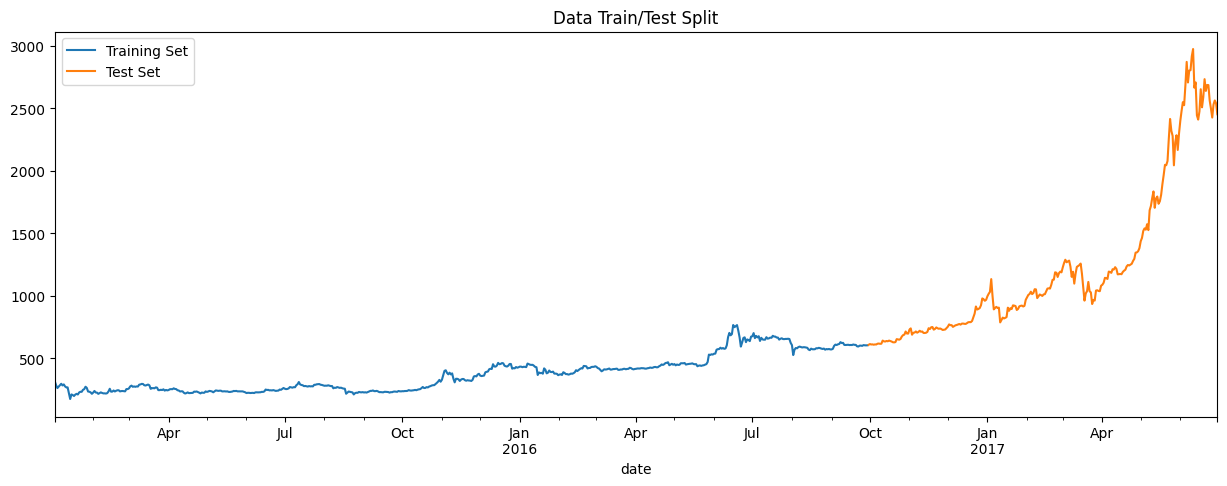

In [ ]:
dfplot=df[['date', 'PriceUSD']]
dfplot = dfplot.set_index('date')
dfplot.index = pd.to_datetime(dfplot.index)
train = dfplot[:int(len(df1)*0.70)]
test = dfplot[int(len(df1)*0.70):]
print(len(df1))
print(len(test))
print(len(train))
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline(df1.iloc[int(len(df1)*0.70),0], color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

<ipython-input-9-2a3e497859dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfplot['prediction'] = y_pred


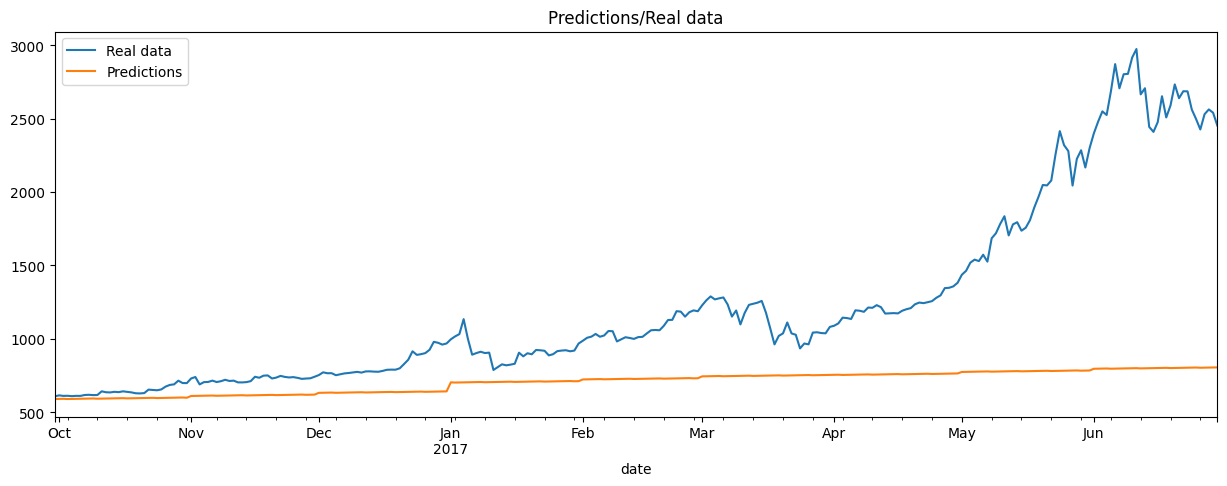

In [ ]:
# Tracer le graphique des prédictions et des données réelles
test = df[int(len(df1)*0.70):]
dfplot = test[['date', 'PriceUSD']]
dfplot['prediction'] = y_pred
dfplot = dfplot.set_index('date')

fig, ax = plt.subplots(figsize=(15, 5))
dfplot.plot(ax=ax, title='Predictions/Real data')
ax.legend(['Real data', 'Predictions'])
#plt.savefig('/content/drive/MyDrive/LRdate.png')
dfplot.to_csv('/content/drive/MyDrive/linearregression.csv')
plt.show()